For those who are frustrated by their scores and need a quick reward...

I am using the following high-scoring kernels. If you like this notebook, please upvote them too!

- [WaveNet-Keras](https://www.kaggle.com/siavrez/wavenet-keras)
- [Single Model lgbm - Kalman Filter](https://www.kaggle.com/teejmahal20/single-model-lgbm-kalman-filter)
- [Seq2Seq RNN with GRU](https://www.kaggle.com/brandenkmurray/seq2seq-rnn-with-gru)
- [LGB + FeatureEngineering - LB 0.940](https://www.kaggle.com/rohitsingh9990/lgb-featureengineering-lb-0-940)
- [Simple two-layer bidirectional LSTM with Pytorch](https://www.kaggle.com/khalildmk/simple-two-layer-bidirectional-lstm-with-pytorch/output)

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# visualize
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
from matplotlib import pyplot
from matplotlib.ticker import ScalarFormatter
sns.set_context("talk")
style.use('fivethirtyeight')

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
from scipy import stats
from tqdm import tqdm_notebook as tqdm

# Any results you write to the current directory are saved as output.

# Load all 

In [9]:
# load submission files
submit = pd.read_csv("./sample_submission.csv")

# high scoring public kernels
paths = {
    "wavenet": "./submission_wavenet.csv",
    "lgbm": "./submission_0.9505.csv",
    #"rnn": "./gru_preds.csv",
    #"knn": "./submission.csv",
    "lstm": "./submission_bilstm.csv",
}
weights = np.array([0.942, 0.939, 0.94]) # LB score as a weight
subs = submit.copy()
for i, p in enumerate(paths.keys()):
    tmp = pd.read_csv(paths[p])
    subs[f"{p}"] = tmp["open_channels"]

subs.drop(columns=["time", "open_channels"], inplace=True)

In [14]:
ranks = pd.DataFrame(columns=paths.keys())
for key in paths.keys():
    ranks[key] = paths[key].open_channels.rank()

AttributeError: 'str' object has no attribute 'open_channels'

In [16]:
for i in paths.keys():
    print(paths[i])

./submission_wavenet.csv
./submission_0.9505.csv
./submission_bilstm.csv


# Similarity analysis

(array([0.5, 1.5, 2.5]), <a list of 3 Text yticklabel objects>)

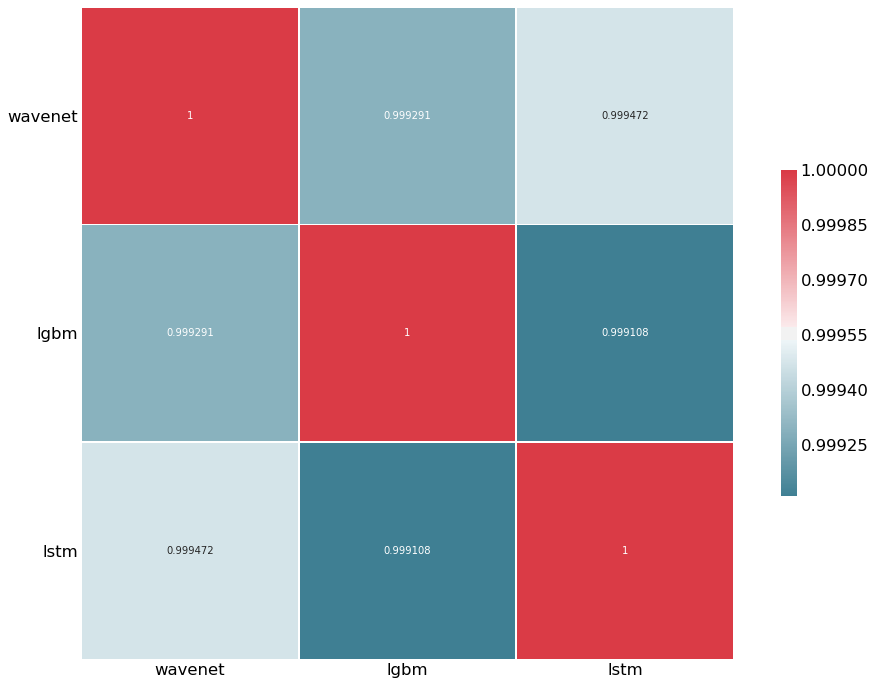

In [10]:
# Compute the correlation matrix
corr = subs.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 12))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, annot=True, fmt="g",
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
ax.set_ylim(corr.shape[0], 0)
plt.yticks(rotation=0)

# Voting

In [4]:
# pandas weighted voting implementation
def weighted_voting(row):
    h = np.histogram(row.values, weights=weights)
    return np.round(h[1][np.argmax(h[0])])

In [11]:
submit["open_channels"] = subs.apply(weighted_voting, axis=1)

# Submit

In [12]:
submit["open_channels"] = submit["open_channels"].astype(int)
submit.to_csv('submission_voting_2.csv', index=False, float_format='%.4f')

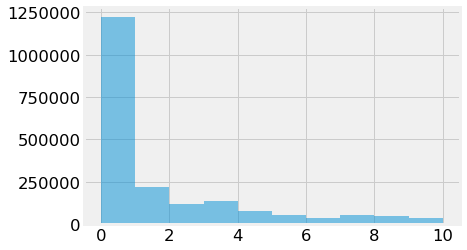

In [7]:
submit["open_channels"].hist(alpha=0.5)

In [8]:
submit

,time,open_channels
0,500.0001,0
1,500.0002,0
2,500.0003,0
3,500.0004,0
4,500.0005,0
...,...,...
1999995,699.9996,0
1999996,699.9997,0
1999997,699.9998,0
1999998,699.9999,0
